In [2]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e3/f8/9246d3c7e185a29d7359d8b12b3d70bf2c3150ecf1427ec1382290e71a56/tensorflow-2.20.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/8f/aa/ba0014cc4659328dc818a28827be78e6d97312ab0cb98105a770924dc11e/absl_py-2.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/ee/1b/00a78aa2e8fbd63f9af08c9c19e6deb3d5d66b4dda677a0f61654680ee89/flatbuffers-25.9.23-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b38461d751c

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.4 which is incompatible.
numba 0.61.2 requires numpy<2.3,>=1.24, but you have numpy 2.3.4 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.4 which is incompatible.


   ------- ------------------------------- 62.3/331.8 MB 453.1 kB/s eta 0:09:55
   ------- ------------------------------- 62.3/331.8 MB 454.3 kB/s eta 0:09:54
   ------- ------------------------------- 62.4/331.8 MB 453.4 kB/s eta 0:09:55
   ------- ------------------------------- 62.4/331.8 MB 453.4 kB/s eta 0:09:55
   ------- ------------------------------- 62.4/331.8 MB 453.4 kB/s eta 0:09:55
   ------- ------------------------------- 62.4/331.8 MB 451.2 kB/s eta 0:09:58
   ------- ------------------------------- 62.4/331.8 MB 450.9 kB/s eta 0:09:58
   ------- ------------------------------- 62.4/331.8 MB 450.6 kB/s eta 0:09:58
   ------- ------------------------------- 62.5/331.8 MB 451.2 kB/s eta 0:09:58
   ------- ------------------------------- 62.5/331.8 MB 451.5 kB/s eta 0:09:57
   ------- ------------------------------- 62.5/331.8 MB 451.5 kB/s eta 0:09:57
   ------- ------------------------------- 62.5/331.8 MB 451.5 kB/s eta 0:09:57
   ------- -----------------------------

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.20.0


In [3]:
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(x_train.shape)
print(x_test.shape)
print(y_train[50000])

(60000, 28, 28, 1)
(10000, 28, 28, 1)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [5]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.8600 - loss: 0.4505 - val_accuracy: 0.9650 - val_loss: 0.1129
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9600 - loss: 0.1344 - val_accuracy: 0.9712 - val_loss: 0.0937
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.9723 - loss: 0.0935 - val_accuracy: 0.9800 - val_loss: 0.0692
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 45ms/step - accuracy: 0.9770 - loss: 0.0775 - val_accuracy: 0.9835 - val_loss: 0.0559
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.9810 - loss: 0.0646 - val_accuracy: 0.9856 - val_loss: 0.0503
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.9840 - loss: 0.0519 - val_accuracy: 0.9851 - val_loss: 0.0514
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9865 - loss: 0.0465 - val_accuracy: 0.9852 - val_loss: 0.0505
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.9872 - loss: 0.0412 - 

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9875 - loss: 0.0481
Test accuracy: 0.987500011920929


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


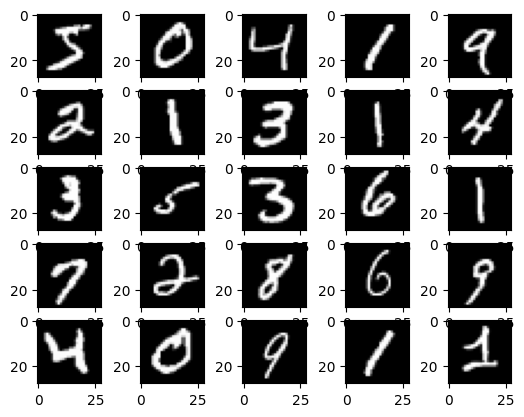

In [9]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, i+1)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [10]:
# example of a cnn for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
# make a prediction
image = x_train[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

(28, 28, 1) 10
Accuracy: 0.986
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
Predicted: class=5


In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [17]:
# load and preprocess the CIFAR-10 dataset
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

# Normalize pixel values to a range of [0,1]
train_images,test_images = train_images/255.0 , test_images/255.0

# One-Hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 220s 1us/step


In [18]:
len(test_images[2])

32

In [19]:
train_images.shape

(50000, 32, 32, 3)

In [20]:
# create a deep learnig model
model = models.Sequential([
    # Step 4: Convolutional Layers
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3), activation = 'relu'),

    # Step 5: Flatten the output
    layers.Flatten(),

    # Step 6: Fully COnnected Layers
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10)
])

In [21]:
# compile the model
model.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [22]:
history = model.fit(train_images,train_labels, epochs = 10 , validation_data = (test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.4505 - loss: 1.5079 - val_accuracy: 0.5518 - val_loss: 1.2534
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5895 - loss: 1.1542 - val_accuracy: 0.6076 - val_loss: 1.1108
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.6458 - loss: 1.0083 - val_accuracy: 0.6386 - val_loss: 1.0182
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6782 - loss: 0.9174 - val_accuracy: 0.6546 - val_loss: 0.9863
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7038 - loss: 0.8442 - val_accuracy: 0.6817 - val_loss: 0.9077
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7251 - loss: 0.7849 - val_accuracy: 0.6844 - val_loss: 0.9255
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7392 - loss: 0.7418 - val_accuracy: 0.6931 - val_loss: 0.8739
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7574 -

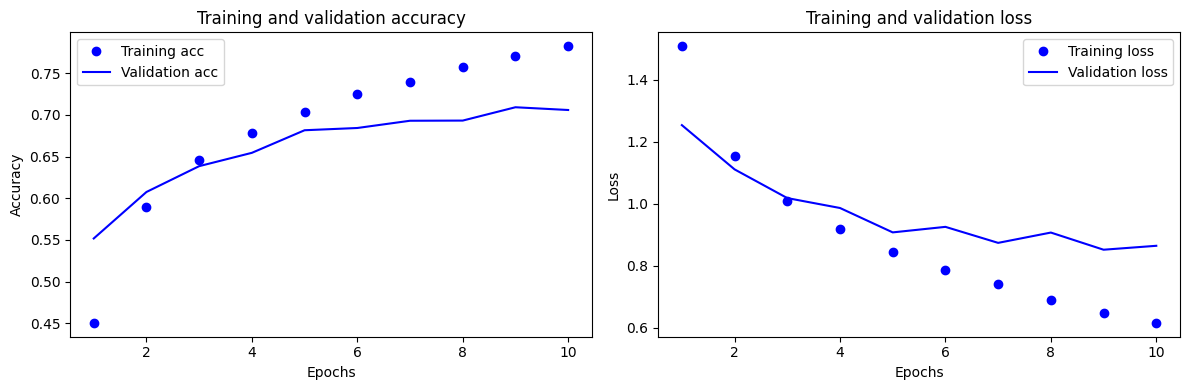

In [23]:
# Visualize training history
def plot_training_history(history):
    # Extract training history metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create plots for accuracy and loss
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss') 
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


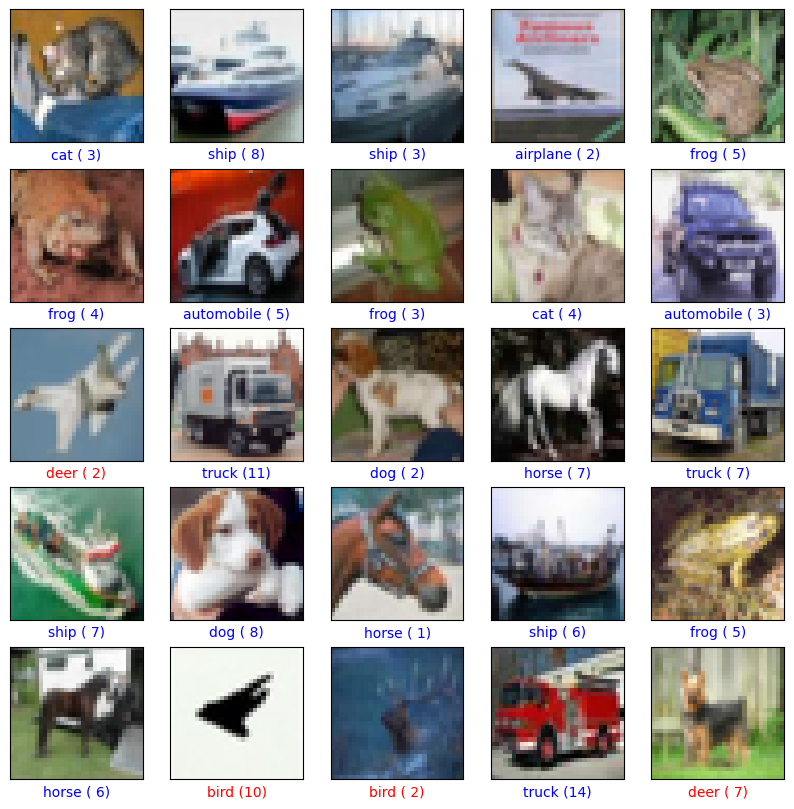

In [24]:
# Visualize example predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', \
               'frog', 'horse', 'ship', 'truck']
 
def plot_example_predictions():
    predictions = model.predict(test_images)
    num_rows, num_cols = 5, 5
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.grid (False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(test_labels[i])
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({np.max(predictions[i]):2.0f})", color=color)
 
# Call the function to plot example predictions
plot_example_predictions()